In [1]:
import matplotlib.pyplot as plt
from sklearn import manifold
import math
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("temp.csv", index_col = 'Unnamed: 0').drop(columns = ['Unnamed: 0.1'])

In [3]:
df1 = df[['pros', 'cons', 'company']]
df1 = df1.dropna(subset=['pros', 'cons'])

In [4]:
df1.head()

,pros,cons,company
0,1 simple product mean huge compliment capitali...,experience indeed truly tale two managers firs...,indeed
1,great company really nice people feel like gre...,none whatsoever company great best work experi...,indeed
2,career development programs bonuses based perf...,becoming big corporate indeed losing unique ch...,indeed
3,unlimited pto great team free food,favoritism lack professionalism knowledge uppe...,indeed
4,good commission structure unlimited pto happy ...,metrics focused one explain quotas generated,indeed


# Pros

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

wordcounter = CountVectorizer(max_df = 0.95, min_df = 10, stop_words = 'english')
document_dtm = wordcounter.fit_transform(df1['pros']).todense()
lda = LatentDirichletAllocation(random_state = 300, n_components = 7)
document_topic = lda.fit_transform(document_dtm)

def print_topic_word(x):
    topic = x.name
    top15_word = ' '.join(x.sort_values(ascending = False)[:15].index.tolist())
    print topic + ': ' + top15_word
    return

word_topic_df = pd.DataFrame(lda.components_.T, index = wordcounter.get_feature_names(), columns = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6','Topic 7'])
result = word_topic_df.apply(print_topic_word)

C:\Users\rache\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic 1: ibm lot job good start years exposure think make experience able place management tech real
Topic 2: good work benefits balance great pay life people salary worklife environment decent culture company nice
Topic 3: free hours great benefits flexible food office pto happy work unlimited good time perks snacks
Topic 4: opportunities company technology different large business resources technologies accenture leadership career grow client clients big
Topic 5: great work people lots company opportunities career environment flexibility working place training lot culture benefits
Topic 6: work new place company working home projects team people time like gm job best year
Topic 7: great management people excellent company working product work training team atmosphere project fun smart new


In [6]:
document_topic = pd.DataFrame(document_topic, columns = ['Pros_Compensation', 'Pros_Work_Life_Balance', 'Pros_Social', 'Pros_Work_Environment', 'Pros_Catered', 'Pros_Career_Growth', 'Pros_Leadership'])
df1 = df1[~df1.index.duplicated()]
document_topic['company'] = df1['company']
document_topic.head()

,Pros_Compensation,Pros_Work_Life_Balance,Pros_Social,Pros_Work_Environment,Pros_Catered,Pros_Career_Growth,Pros_Leadership,company
0,0.148421,0.014305,0.014298,0.389691,0.014333,0.014319,0.404634,indeed
1,0.015890,0.015919,0.015911,0.015894,0.635425,0.285024,0.015936,indeed
2,0.007584,0.007554,0.007566,0.007604,0.877895,0.007588,0.084209,indeed
3,0.020408,0.020424,0.877297,0.020438,0.020458,0.020465,0.020511,indeed
4,0.014299,0.014364,0.914185,0.014286,0.014288,0.014288,0.014289,indeed


In [7]:
topic_pivot1 = pd.pivot_table(document_topic, index = 'company', aggfunc= np.mean)

In [8]:
topic_pivot1

,Pros_Career_Growth,Pros_Catered,Pros_Compensation,Pros_Leadership,Pros_Social,Pros_Work_Environment,Pros_Work_Life_Balance
company,,,,,,,
accenture,0.132314,0.175334,0.078609,0.117823,0.072311,0.155082,0.268528
gm,0.146523,0.144121,0.064177,0.116879,0.074493,0.118447,0.335359
ibm,0.212522,0.178709,0.086844,0.055727,0.079675,0.114849,0.271675
indeed,0.112088,0.187796,0.056690,0.173273,0.266091,0.058231,0.145831


# cons

In [9]:
wordcounter = CountVectorizer(max_df = 0.95, min_df = 10, stop_words = 'english')
document_dtm = wordcounter.fit_transform(df1['cons']).todense()
lda = LatentDirichletAllocation(random_state = 300, n_components = 7)
document_topic = lda.fit_transform(document_dtm)

def print_topic_word(x):
    topic = x.name
    top15_word = ' '.join(x.sort_values(ascending = False)[:20].index.tolist())
    print topic + ': ' + top15_word
    return

word_topic_df = pd.DataFrame(lda.components_.T, index = wordcounter.get_feature_names(), columns = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7'])
result = word_topic_df.apply(print_topic_word)

C:\Users\rache\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic 1: process need growth bit working better slow changing constantly major start change systems experience means terms stressful bureaucracy available wont
Topic 2: like people projects career difficult level travel growth senior company communication advancement management teams positions different salary good departments job
Topic 3: work management project balance lot environment managers life long projects worklife really consulting politics time accenture certain client hard limited
Topic 4: sales people management day job leads make hours calls dont team reps lead know long really times company good like
Topic 5: work company hard think companies pay working place great good lots big lot want youre large cons best way like
Topic 6: employees company career new work people managers team good pay getting job years management bad time year development manager opportunities
Topic 7: lack low company pay office management times new market small poor employees products employee peo

In [10]:
document_topic = pd.DataFrame(document_topic, columns = ['Cons_Growing_Pain', 'Cons_Career_Growth', 'Cons_Work_Life_Balance', 'Cons_Sales_Frustration', 'Cons_Others', 'Cons_Management', 'Cons_Compensation'])
df1 = df1[~df1.index.duplicated()]
document_topic['company'] = df1['company']
document_topic.head()

,Cons_Growing_Pain,Cons_Career_Growth,Cons_Work_Life_Balance,Cons_Sales_Frustration,Cons_Others,Cons_Management,Cons_Compensation,company
0,0.004612,0.004627,0.004624,0.423801,0.004615,0.553096,0.004626,indeed
1,0.028571,0.028585,0.028615,0.028585,0.828427,0.028615,0.028601,indeed
2,0.010207,0.938517,0.010285,0.010236,0.010216,0.010260,0.010278,indeed
3,0.006267,0.006255,0.569299,0.006224,0.006216,0.006248,0.399491,indeed
4,0.047690,0.047619,0.047631,0.714181,0.047619,0.047630,0.047630,indeed


In [11]:
topic_pivot2 = pd.pivot_table(document_topic, index = 'company', aggfunc= np.mean)
topic_pivot2

,Cons_Career_Growth,Cons_Compensation,Cons_Growing_Pain,Cons_Management,Cons_Others,Cons_Sales_Frustration,Cons_Work_Life_Balance
company,,,,,,,
accenture,0.126737,0.117239,0.070343,0.209262,0.181666,0.101450,0.193305
gm,0.132895,0.089158,0.095285,0.235096,0.191138,0.096647,0.159781
ibm,0.134018,0.070612,0.063114,0.264988,0.095092,0.107835,0.264341
indeed,0.121537,0.125335,0.082278,0.165203,0.166560,0.222592,0.116496


In [12]:
accpros=pd.read_csv('accenturepros.csv')
ibmpros=pd.read_csv('ibmpros.csv')
gmpros=pd.read_csv('gmpros.csv')
indeedpros=pd.read_csv('indeedpros.csv')

acccons=pd.read_csv('accenturecons.csv')
ibmcons=pd.read_csv('ibmcons.csv')
gmcons=pd.read_csv('gmcons.csv')
indeedcons=pd.read_csv('indeedcons.csv')

In [13]:
topics=list(accpros['word'])
companies=['accenture','ibm','gm','indeed']

In [14]:
#calculate percentage frequency of each topic in pros and cons for each company, and use [percent pros minus cons] as the ratio (kinda like normalization).
#e.g. indeed--pay_and_benefit is -25.3%, meaning the percentage cons for pay exceed pros by 25.3%
combine=pd.DataFrame(dict(acc=(accpros['count']-acccons['count'])*100/1454,
                          ibm=(ibmpros['count']-ibmcons['count'])*100/874,
                          gm=(gmpros['count']-gmcons['count'])*100/808,
                          indeed=(indeedpros['count']-indeedcons['count'])*100/569))
combine=combine.T
combine.columns=topics
combine
#need illustration

,career_development,pay_and_benefit,work_life_balance,supportive,management,skillOriented,levelofleisure,innovative,structure,ethics,performance-Oriented,team_first
acc,21.939477,11.141678,-9.353508,5.295736,4.814305,1.306740,1.031637,0.137552,0.068776,-0.275103,-0.343879,-0.068776
gm,16.707921,3.589109,0.247525,4.950495,3.836634,-0.371287,0.371287,0.123762,-0.123762,-0.866337,-0.618812,0.123762
ibm,-1.945080,0.343249,-2.402746,1.945080,5.949657,-0.228833,0.000000,0.343249,-0.343249,-0.572082,0.114416,-0.114416
indeed,-25.307557,2.460457,-1.230228,3.339192,7.029877,5.623902,0.000000,0.000000,-2.108963,-0.702988,-0.527241,-0.175747


In [15]:
combine.to_csv('chart.csv')

In [16]:
combine.columns=['Career Development','Pay+Benefit','Work/Life','Supportive','Management','Skill Oriented','Leisure','Innovative','Structure','Ethics'
,'Performance Oriented','Team']

In [17]:
def _color_red_or_green(val):
    if val>5:
        color = 'green' 
    else:
        color = 'black'
    return 'color: %s' % color

In [18]:
combine

,Career Development,Pay+Benefit,Work/Life,Supportive,Management,Skill Oriented,Leisure,Innovative,Structure,Ethics,Performance Oriented,Team
acc,21.939477,11.141678,-9.353508,5.295736,4.814305,1.306740,1.031637,0.137552,0.068776,-0.275103,-0.343879,-0.068776
gm,16.707921,3.589109,0.247525,4.950495,3.836634,-0.371287,0.371287,0.123762,-0.123762,-0.866337,-0.618812,0.123762
ibm,-1.945080,0.343249,-2.402746,1.945080,5.949657,-0.228833,0.000000,0.343249,-0.343249,-0.572082,0.114416,-0.114416
indeed,-25.307557,2.460457,-1.230228,3.339192,7.029877,5.623902,0.000000,0.000000,-2.108963,-0.702988,-0.527241,-0.175747


In [35]:
combine.to_csv('chart.csv')


In [19]:
combine1=combine.copy()
combine1.style.applymap(_color_red_or_green)

,Career Development,Pay+Benefit,Work/Life,Supportive,Management,Skill Oriented,Leisure,Innovative,Structure,Ethics,Performance Oriented,Team
acc,21.9395,11.1417,-9.35351,5.29574,4.81431,1.30674,1.03164,0.137552,0.0687758,-0.275103,-0.343879,-0.0687758
gm,16.7079,3.58911,0.247525,4.9505,3.83663,-0.371287,0.371287,0.123762,-0.123762,-0.866337,-0.618812,0.123762
ibm,-1.94508,0.343249,-2.40275,1.94508,5.94966,-0.228833,0,0.343249,-0.343249,-0.572082,0.114416,-0.114416
indeed,-25.3076,2.46046,-1.23023,3.33919,7.02988,5.6239,0,0,-2.10896,-0.702988,-0.527241,-0.175747


In [20]:
def _color_red_(val):
    if val<-5:
        color = 'sienna' 
    else:
        color = 'black'
    return 'color: %s' % color

In [21]:
combine2=combine.copy()
combine2.style.applymap(_color_red_)

,Career Development,Pay+Benefit,Work/Life,Supportive,Management,Skill Oriented,Leisure,Innovative,Structure,Ethics,Performance Oriented,Team
acc,21.9395,11.1417,-9.35351,5.29574,4.81431,1.30674,1.03164,0.137552,0.0687758,-0.275103,-0.343879,-0.0687758
gm,16.7079,3.58911,0.247525,4.9505,3.83663,-0.371287,0.371287,0.123762,-0.123762,-0.866337,-0.618812,0.123762
ibm,-1.94508,0.343249,-2.40275,1.94508,5.94966,-0.228833,0,0.343249,-0.343249,-0.572082,0.114416,-0.114416
indeed,-25.3076,2.46046,-1.23023,3.33919,7.02988,5.6239,0,0,-2.10896,-0.702988,-0.527241,-0.175747


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

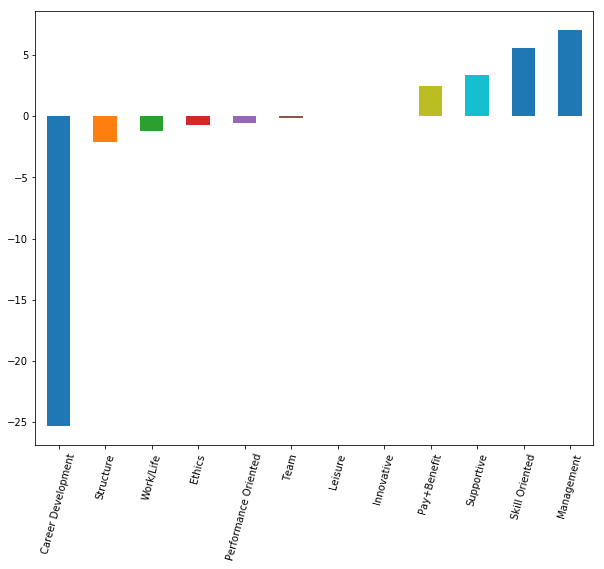

In [22]:
combine.loc['indeed'].sort_values().plot(kind='bar',figsize=(10, 8))
plt.xticks(rotation=75)

In [23]:
def cosine_dissimilarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return 1-sumxy/(math.sqrt(sumxx)*math.sqrt(sumyy))

In [24]:
dissim=pd.DataFrame(index=companies,columns=companies).fillna(0)

In [25]:
#for each pair of companies, calculate the cosine dissimilarity (derived by first calculating cosine similarity, then 1-similarity we get dissimilarity)
for i in range(0,4):
    for j in range(0,4):
        dissim.iloc[i,j]=np.abs(round(cosine_dissimilarity(combine.iloc[i].values,combine.iloc[j].values),3))

In [26]:
dissim

,accenture,ibm,gm,indeed
accenture,0.000,0.099,0.883,1.613
ibm,0.099,0.000,0.991,1.746
gm,0.883,0.991,0.000,0.473
indeed,1.613,1.746,0.473,0.000


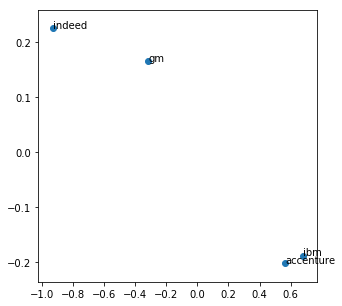

In [27]:
#using the dissimilarity to plot the distance among companies.
mds = manifold.MDS(n_components=2, max_iter=1000, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dissim).embedding_
mds_brands = list(dissim.index.values)

pos_x = [x[0] for x in pos]
pos_y = [x[1] for x in pos]
plt.figure(figsize=(5,5))
plt.scatter(pos_x, pos_y)
for i in range(len(mds_brands)):
    plt.text(pos_x[i], pos_y[i], mds_brands[i])
plt.show()
#need illustration

In [28]:
pros_topics=list(topic_pivot1.columns)
cons_topics=list(topic_pivot2.columns)

In [29]:
dissim_pros=pd.DataFrame(index=companies,columns=companies).fillna(0)
dissim_cons=pd.DataFrame(index=companies,columns=companies).fillna(0)

In [30]:
for i in range(0,4):
    for j in range(0,4):
        dissim_pros.iloc[i,j]=np.abs(round(cosine_dissimilarity(topic_pivot1.iloc[i].values,topic_pivot1.iloc[j].values),3))
        
for i in range(0,4):
    for j in range(0,4):
        dissim_cons.iloc[i,j]=np.abs(round(cosine_dissimilarity(topic_pivot2.iloc[i].values,topic_pivot2.iloc[j].values),3))

In [31]:
dissim_pros

,accenture,ibm,gm,indeed
accenture,0.000,0.018,0.034,0.191
ibm,0.018,0.000,0.037,0.223
gm,0.034,0.037,0.000,0.220
indeed,0.191,0.223,0.220,0.000


In [32]:
dissim_cons

,accenture,ibm,gm,indeed
accenture,0.000,0.010,0.049,0.073
ibm,0.010,0.000,0.062,0.078
gm,0.049,0.062,0.000,0.152
indeed,0.073,0.078,0.152,0.000


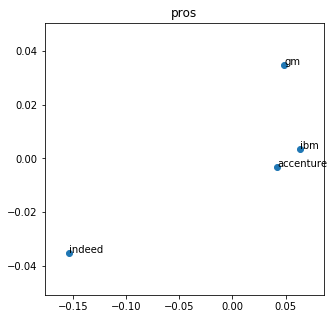

In [33]:
mds = manifold.MDS(n_components=2, max_iter=1000, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dissim_pros).embedding_
mds_brands = list(dissim_pros.index.values)

pos_x = [x[0] for x in pos]
pos_y = [x[1] for x in pos]
plt.figure(figsize=(5,5))
plt.scatter(pos_x, pos_y)
for i in range(len(mds_brands)):
    plt.text(pos_x[i], pos_y[i], mds_brands[i])
plt.title('pros')
plt.show()

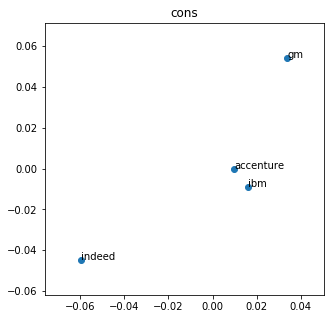

In [34]:
mds = manifold.MDS(n_components=2, max_iter=1000, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dissim_cons).embedding_
mds_brands = list(dissim_cons.index.values)

pos_x = [x[0] for x in pos]
pos_y = [x[1] for x in pos]
plt.figure(figsize=(5,5))
plt.scatter(pos_x, pos_y)
for i in range(len(mds_brands)):
    plt.text(pos_x[i], pos_y[i], mds_brands[i])
plt.title('cons')
plt.show()